In [ ]:
import os
import gdown
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
#@title Подключение Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#@title Загружаем yolov8
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.0/78.2 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
#@title Загружаем датасет
!mkdir {HOME}/datasets
!gdown --fuzzy https://drive.google.com/file/d/1AiFWjlS3jA5GppNM-AIRvSuXEV5w_EQ9/view?usp=sharing
!unzip -qo helmet.zip -d /content/datasets

Downloading...
From: https://drive.google.com/uc?id=1AiFWjlS3jA5GppNM-AIRvSuXEV5w_EQ9
To: /content/helmet.zip
100% 342M/342M [00:03<00:00, 110MB/s] 


In [ ]:
#@title Обучение модели
%cd {HOME}
!yolo task=detect mode=train model=yolov8n.pt data=/content/datasets/data.yaml epochs=30 imgsz=640 plots=True

/content
100% 6.23M/6.23M [00:00<00:00, 354MB/s]
Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False,

In [ ]:
#@title Создаем папку на Google Диск и копируем на него веса модели best.pt
%mkdir -p /content/drive/MyDrive/weights/
!cp /content/runs/detect/train/weights/best.pt /content/drive/MyDrive/weights/

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1699783912.06f289b33be0.3190.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2780.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch2781.jpg  weights
P_curve.png					    train_batch2782.jpg
PR_curve.png					    train_batch2.jpg


/content


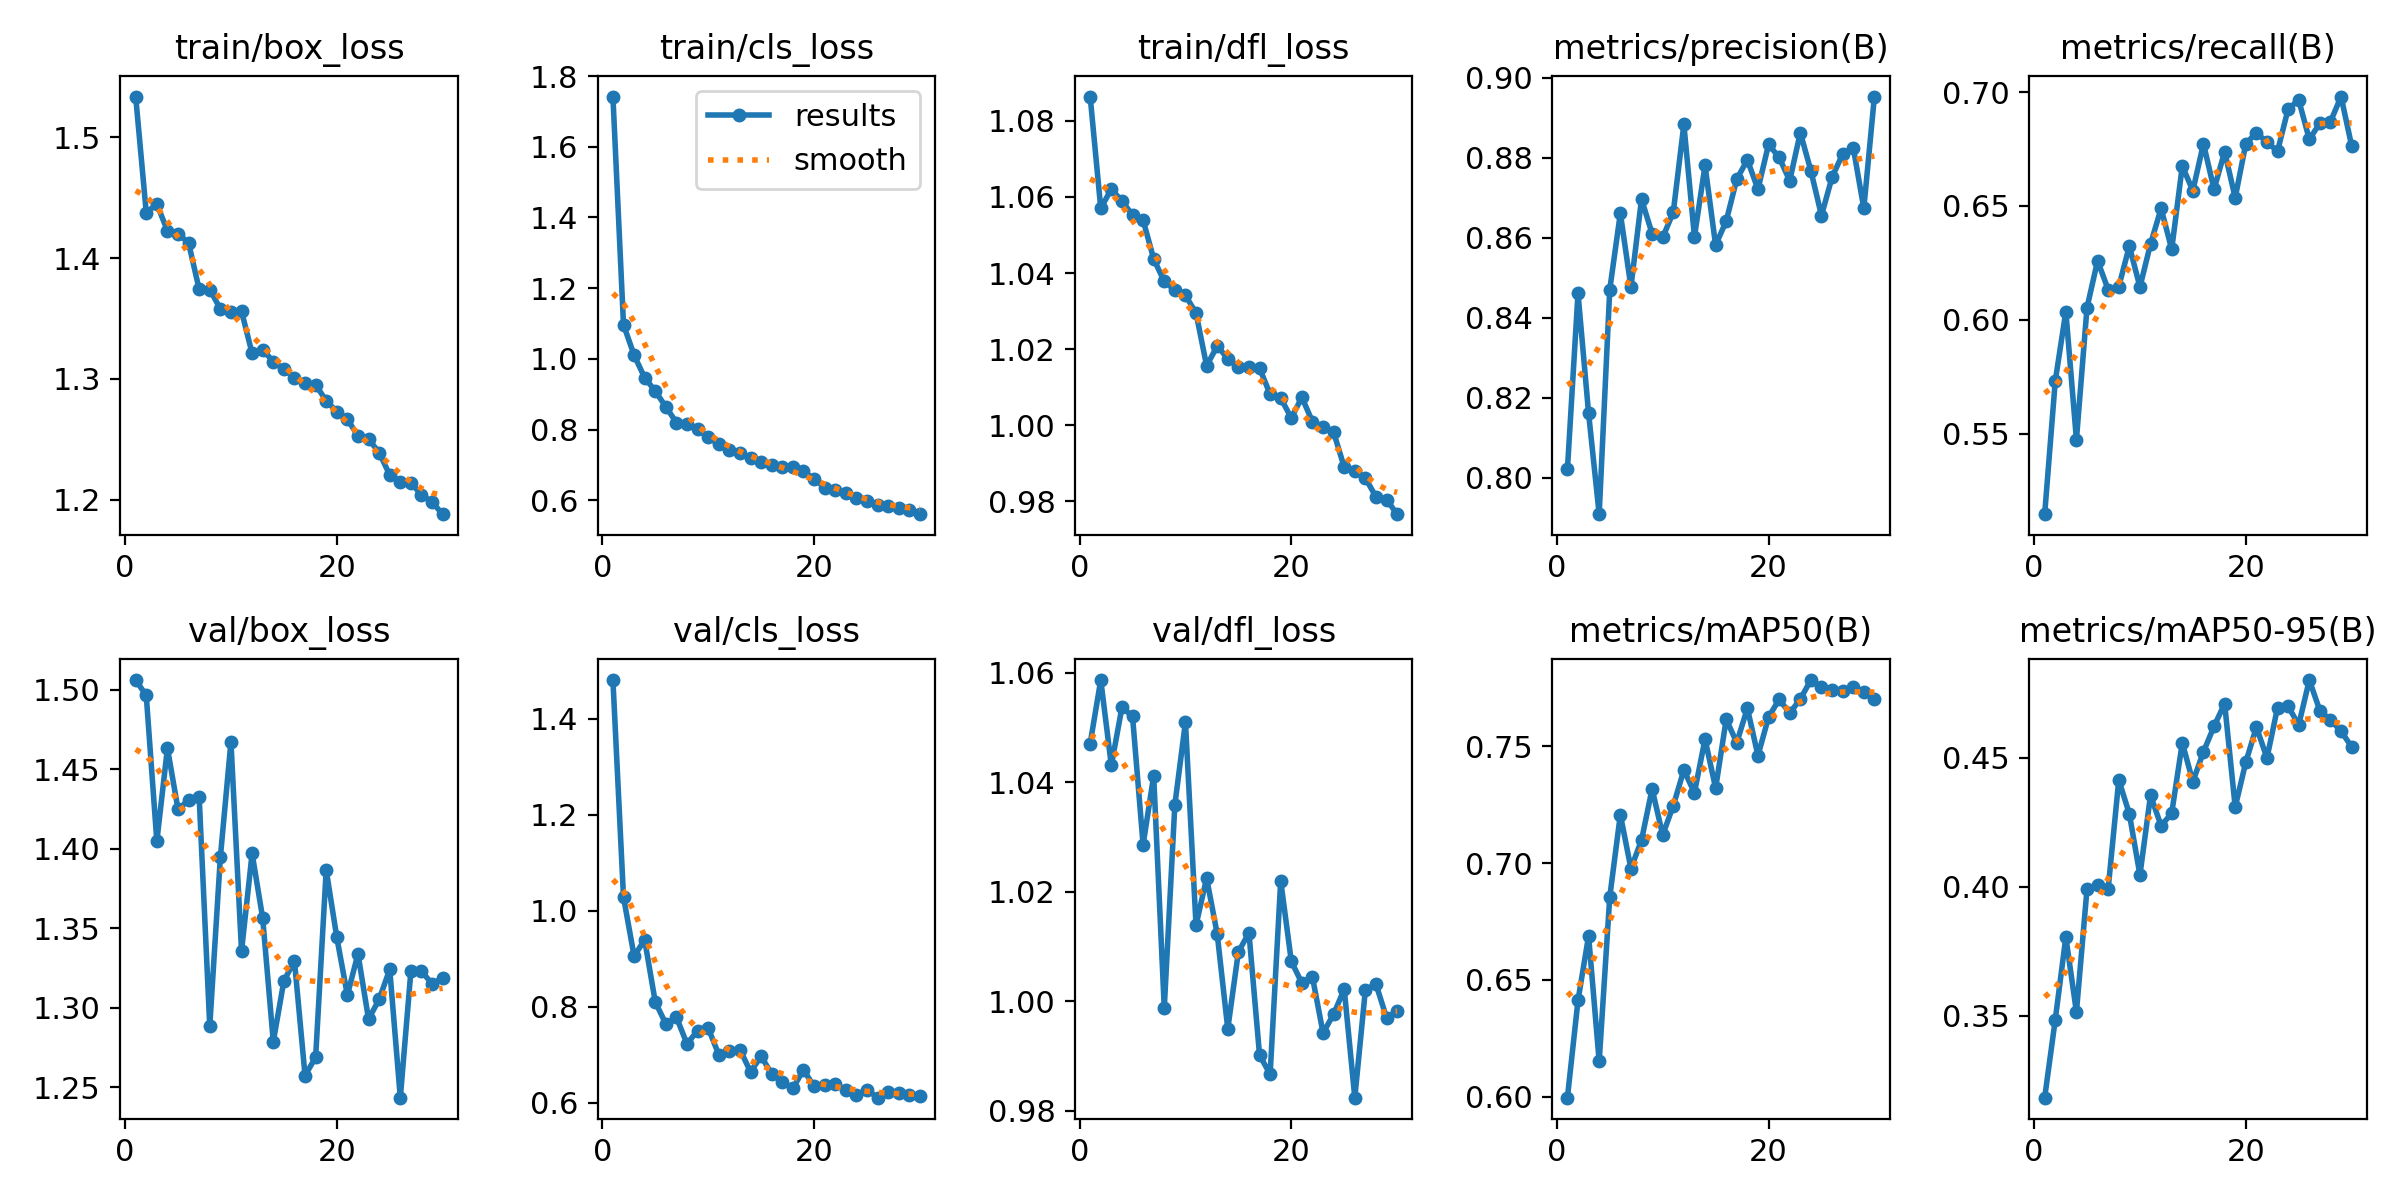

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=1000)

/content


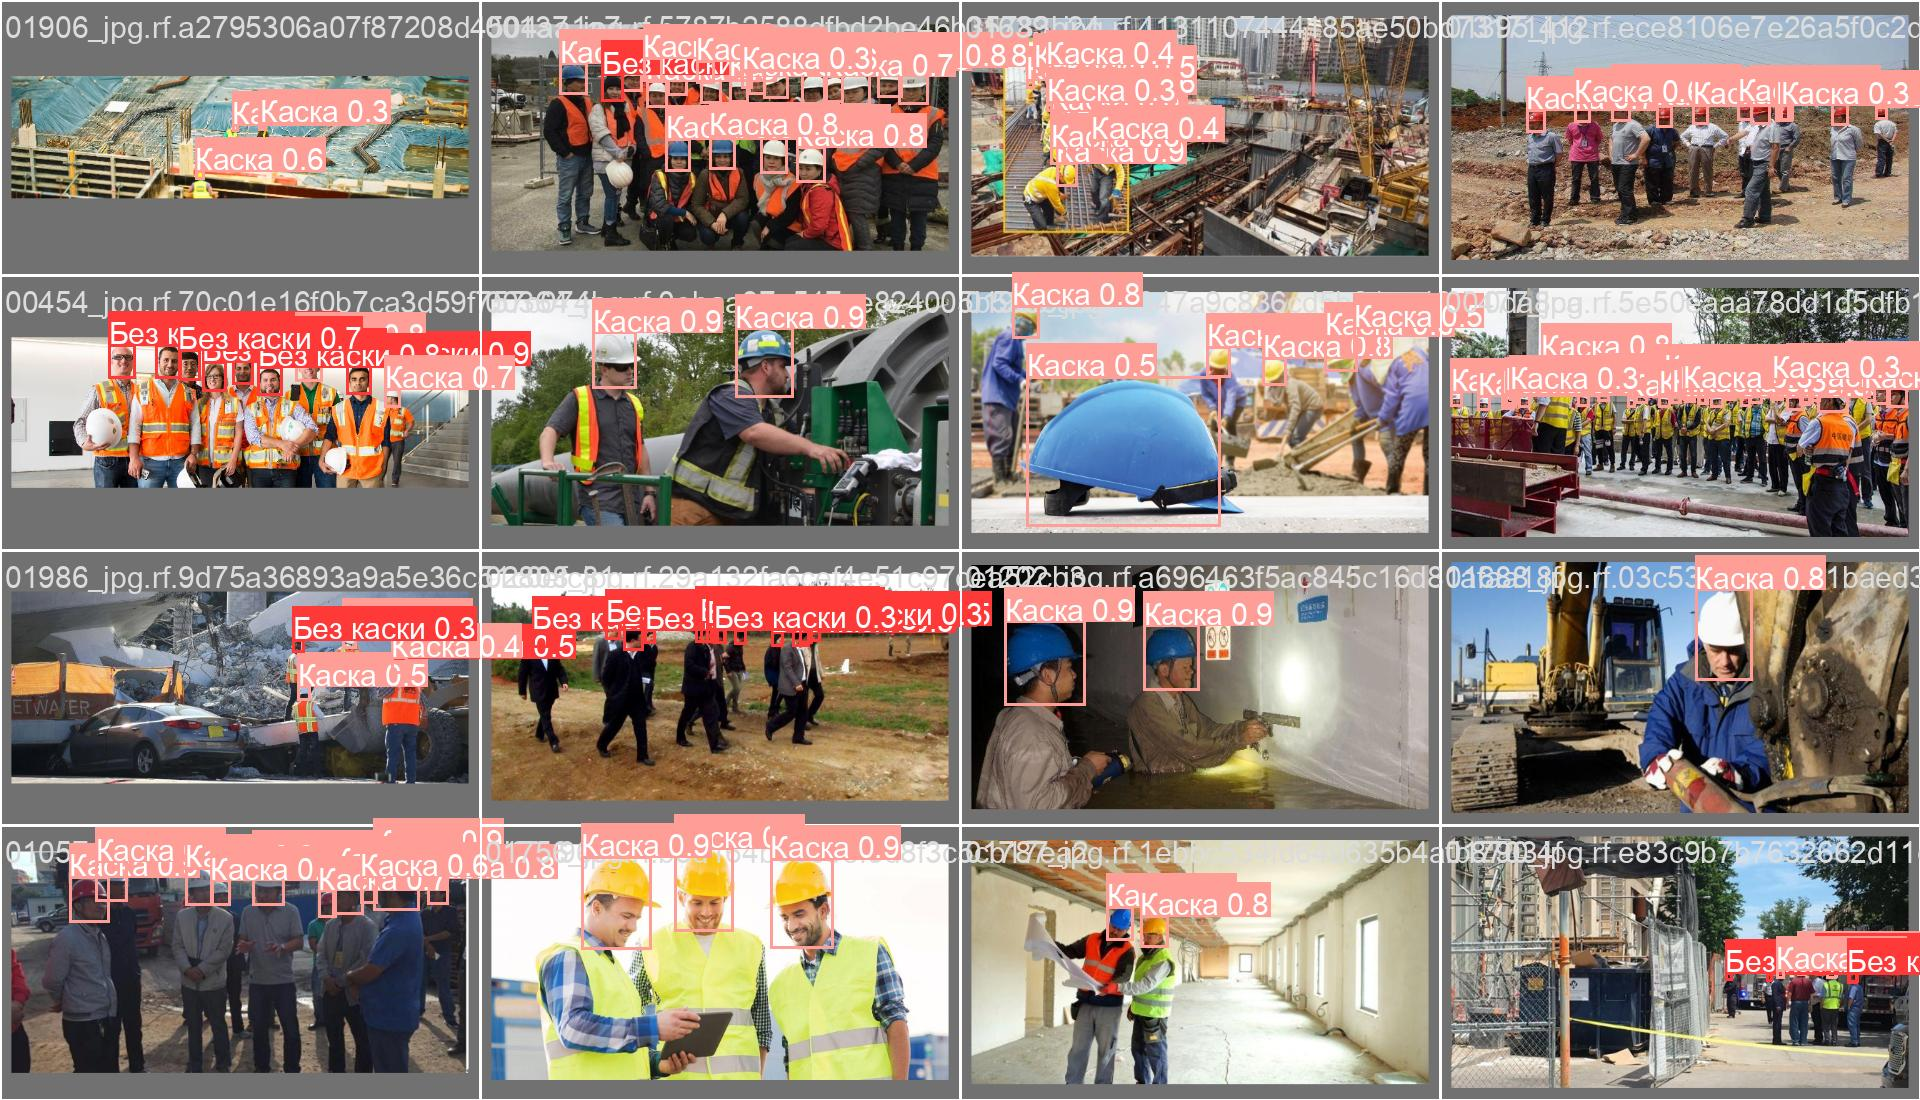

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=1000)

In [ ]:
#@title Валидация
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=/content/datasets/data.yaml

/content
Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/valid/labels.cache... 631 images, 0 backgrounds, 0 corrupt: 100% 631/631 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 40/40 [00:16<00:00,  2.40it/s]
                   all        631       4683      0.875       0.68      0.774      0.479
             Без каски        631       1067      0.863      0.651      0.765      0.459
                 Каска        631       3616      0.887      0.708      0.783        0.5
Speed: 1.1ms preprocess, 8.3ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
#@title Предсказание модели на обученных данных
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/datasets/test/images save=True

/content
Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs

image 1/316 /content/datasets/test/images/00017_jpg.rf.3dec517030387e8973179a3a3cb331a1.jpg: 480x640 2 Каскаs, 89.6ms
image 2/316 /content/datasets/test/images/00019_jpg.rf.6c2447d110c70342d697d29d146e7fde.jpg: 320x640 4 Каскаs, 70.2ms
image 3/316 /content/datasets/test/images/00032_jpg.rf.f76007da02d99dbb2e78199809f03e21.jpg: 448x640 2 Каскаs, 56.1ms
image 4/316 /content/datasets/test/images/00105_jpg.rf.1290b375488b6dc278223af4f832bc33.jpg: 480x640 10 Каскаs, 7.3ms
image 5/316 /content/datasets/test/images/00112_jpg.rf.af326fe039dfc1d922498e09cf4c6ac8.jpg: 448x640 2 Каскаs, 7.1ms
image 6/316 /content/datasets/test/images/00116_jpg.rf.4d6c2024f914c27bf9502c70a3544de7.jpg: 448x640 9 Каскаs, 6.4ms
image 7/316 /content/datasets/test/images/00121_jpg.rf.f45593346d63a4815fa1688a0b7ff217.jpg: 448x640 2 Каскаs, 6.3ms


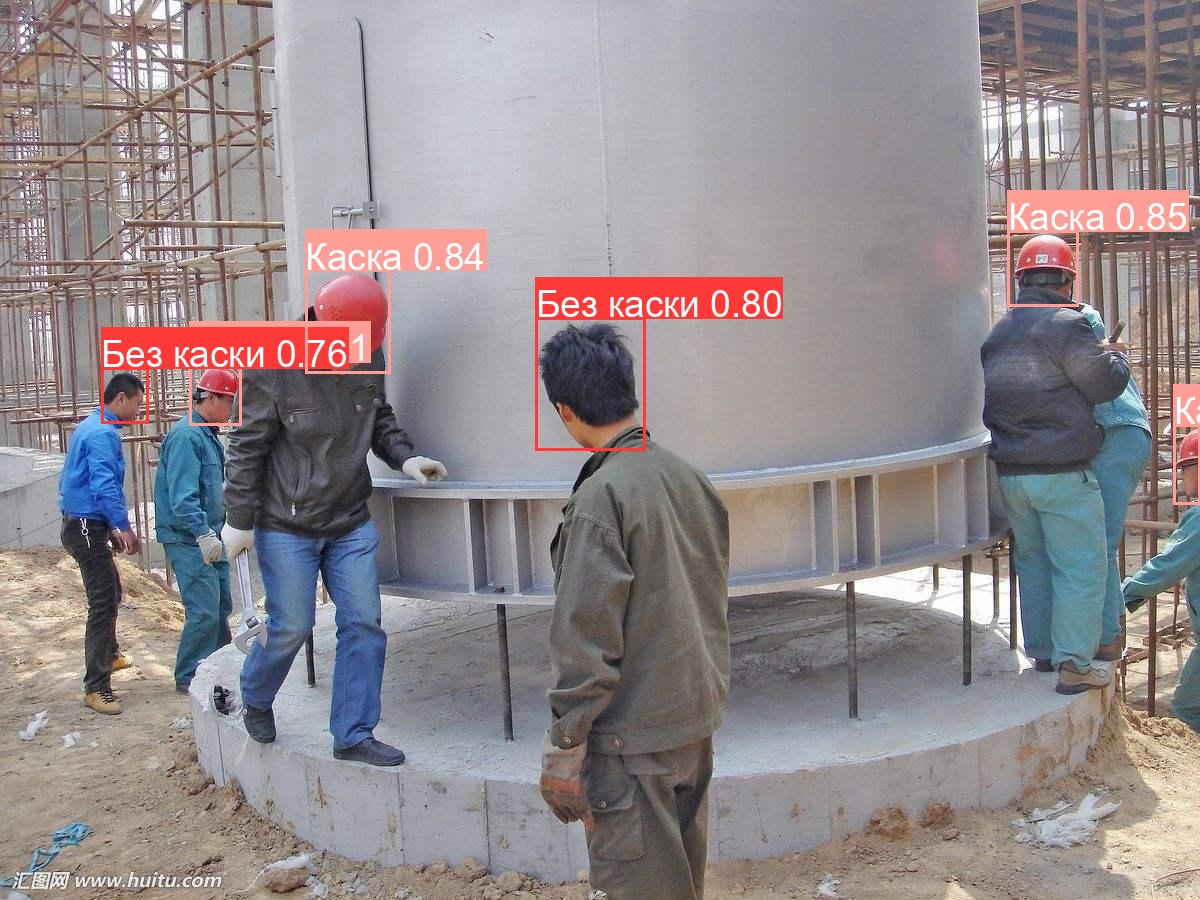

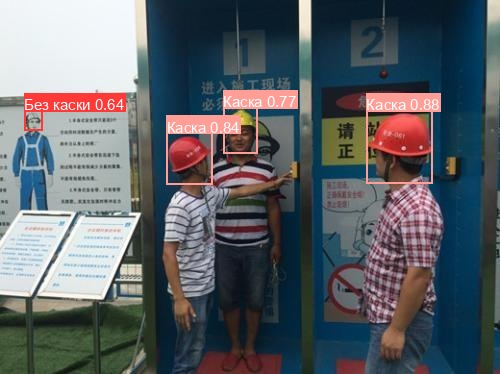

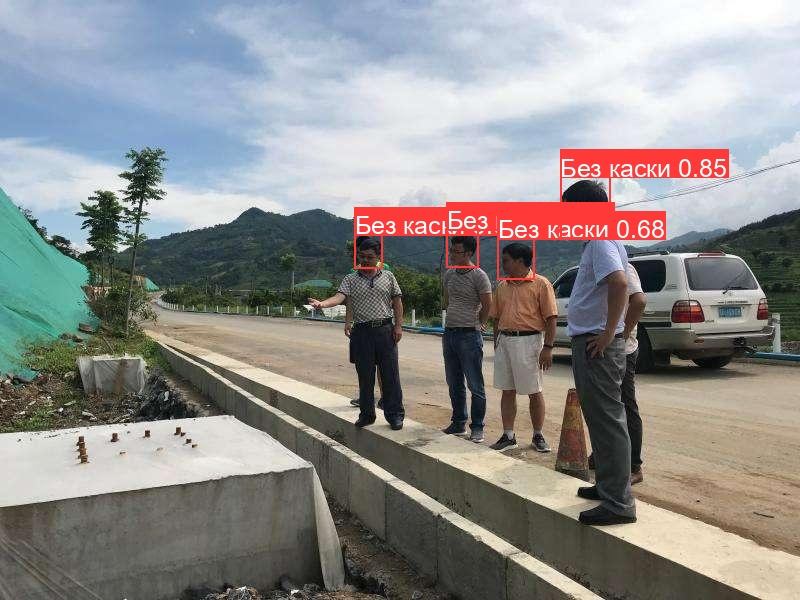

In [ ]:
#@title Подгружаем предсказанные изображения
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")